## Plot of non linear params $Bl(x), K_m(x), L_e(x)$

            4             3             2
-5.538e+14 x - 6.036e+09 x + 6.896e+06 x + 54.15 x + 6.833


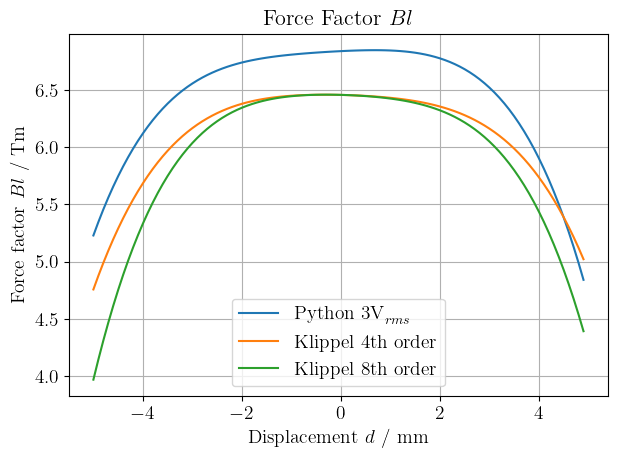

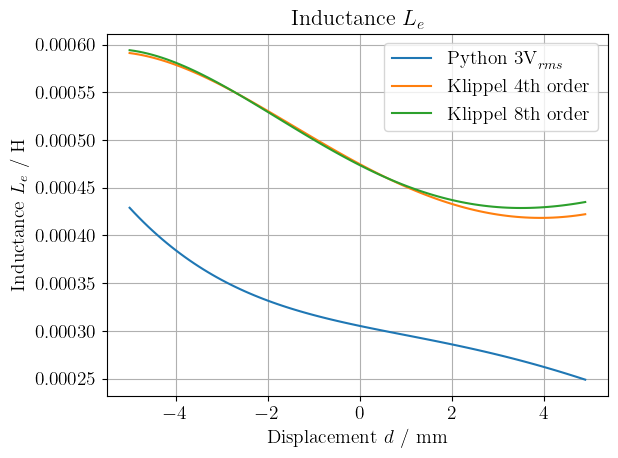

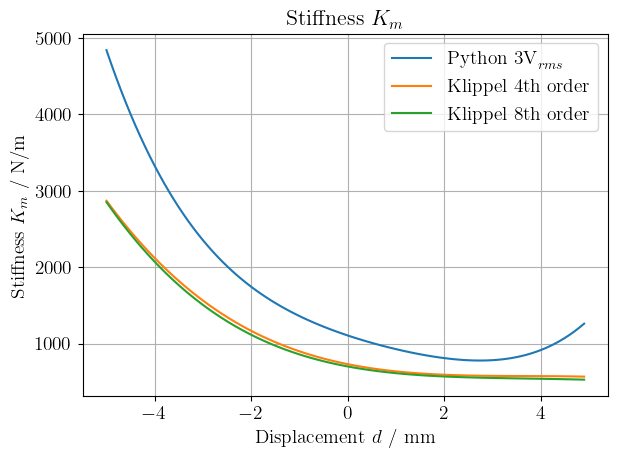

In [27]:
import engutil
import util
import numpy as np 

params, polys_klippel_4th = util.load_speaker_parameters("data/parameters/klippel-params-4th-order.json", dataset_name="4thorder")
params, polys_klippel_8th = util.load_speaker_parameters("data/parameters/klippel-params-4th-order.json", dataset_name="8thorder")
params, polys_python_3v = util.load_speaker_parameters("data/parameters/python-params-1.json", dataset_name="3Vrms")
params, polys_python_015v = util.load_speaker_parameters("data/parameters/python-params-1.json", dataset_name="015Vrms")

x = np.arange(-5e-3, 5e-3, 1e-4)
x_plot = x*1e3


y_K_klippel_4th = polys_klippel_4th["K"](x)
y_Le_klippel_4th = polys_klippel_4th["Le"](x)
y_Bl_klippel_4th = polys_klippel_4th["Bl"](x)

y_K_klippel_8th = polys_klippel_8th["K"](x)
y_Le_klippel_8th = polys_klippel_8th["Le"](x)
y_Bl_klippel_8th = polys_klippel_8th["Bl"](x)

y_Bl_python_3v = polys_python_3v["Bl"](x)
y_Le_python_3v = polys_python_3v["Le"](x) 
y_K_python_3v = polys_python_3v["K"](x)


y_Bl_python_015v = polys_python_015v["Bl"](x)
y_Le_python_015v = polys_python_015v["Le"](x) 
y_K_python_015v = polys_python_015v["K"](x)


print(polys_python_015v["Bl"])

legends = ["$\\textrm{Python 3V}_{rms}$", "$\\textrm{Klippel 4th order}$", "$\\textrm{Klippel 8th order}$"]

# engutil.plot_time_series([(x_plot,y_Bl_python_015v)], ylabel="Force factor $Bl$ / Tm", xlabel="Displacement $d$ / mm", title="Force Factor $Bl$", save_loc="figures/nonlins/force_factor", grid=True, legends=legends)


engutil.plot_time_series([(x_plot,y_Bl_python_3v), (x_plot, y_Bl_klippel_4th), (x_plot, y_Bl_klippel_8th)], ylabel="Force factor $Bl$ / Tm", xlabel="Displacement $d$ / mm", title="Force Factor $Bl$", save_loc="figures/nonlins/force_factor", grid=True, legends=legends)


engutil.plot_time_series([(x_plot,y_Le_python_3v), (x_plot, y_Le_klippel_4th), (x_plot, y_Le_klippel_8th)], ylabel="Inductance $L_e$ / H", xlabel="Displacement $d$ / mm", title="Inductance $L_e$", save_loc="figures/nonlins/inductance", grid=True, legends=legends)



engutil.plot_time_series([(x_plot,y_K_python_3v), (x_plot, y_K_klippel_4th), (x_plot, y_K_klippel_8th)], ylabel="Stiffness $K_m$ / N/m ", xlabel="Displacement $d$ / mm", title="Stiffness $K_m$ ", save_loc="figures/nonlins/stiffness", grid=True, legends=legends)
